In [1]:
from dora.api import DataExplorer
from matplotlib import pyplot as plt,rcParams

rcParams['figure.figsize'] = (18.0, 10.0)

explorer = DataExplorer()

# Benchmarking

In [5]:
client_df = (explorer
    .benchmarks
    .clientActivity()
    .to_pandas())

client_df.head()

,clientid,hour,api_calls
0,164451908948,0,0
1,164451908948,1,0
2,164451908948,2,0
3,164451908948,3,0
4,164451908948,4,0


In [6]:
def plot_multiple_benchmark_lines(df):
    fig,ax = plt.subplots()

    labels = []
    for key, grp in df.groupby(['clientid']):
        ax = grp.plot(ax=ax, kind='line', x='hour', y='api_calls', c=key)
        labels.append(key)
    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    plt.show()

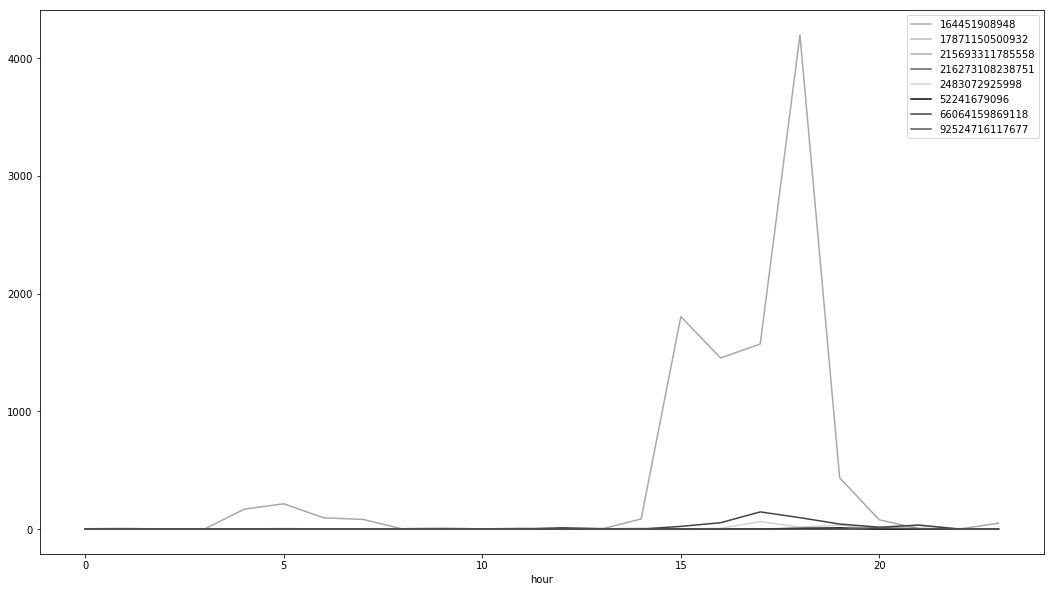

In [7]:
plot_multiple_benchmark_lines(client_df)

## Filtered Example

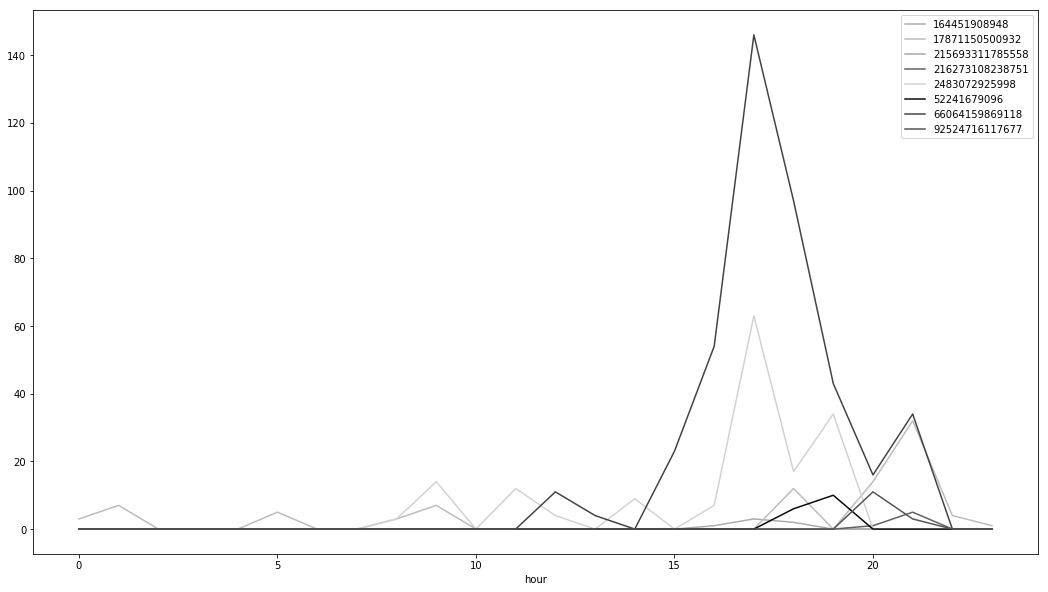

In [8]:
plot_multiple_benchmark_lines(
    explorer
        .benchmarks
        .clientActivity(
            clientid_filter=[
                '66064159869118',
                '164451908948',
                '17871150500932',
                '216273108238751',
                '92524716117677',
                '2483072925998',
                '52241679096'])
        .to_pandas())


## Performance Outliers

In [13]:
df = (explorer
    .benchmarks
    .statsByFunction()
    .to_pandas())

df.head()

,function_name,is_cached,avg_runtime_seconds,total_runtime_seconds,invocations
0,Customers.idsForCustomer,False,241.295379,1206.476897,5
1,Customers.clusterCustomers,False,79.791522,2473.537188,31
2,Categories.parentsOf,True,63.841114,63.841114,1
3,Customers.statsByCustomer,False,8.170416,24.511248,3
4,Products.priceDistribution,False,3.382230,98.084676,29


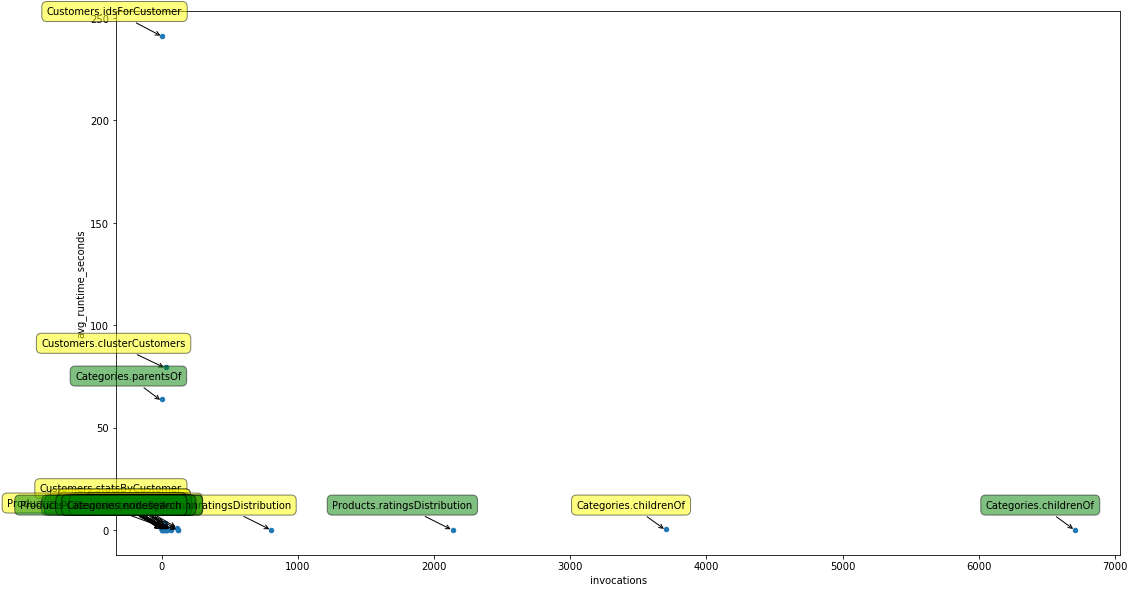

In [14]:
df.plot.scatter(
    x='invocations',
    y='avg_runtime_seconds')

for i,x in df.iterrows():
    color = 'green' if x['is_cached'] else 'yellow'
    plt.annotate(
        x['function_name'],
        xy=(int(x['invocations']), int(x['avg_runtime_seconds'])), xytext=(20, 20),
         textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5',fc=color, alpha=0.5),
        arrowprops=dict(arrowstyle = '->'))

plt.show()

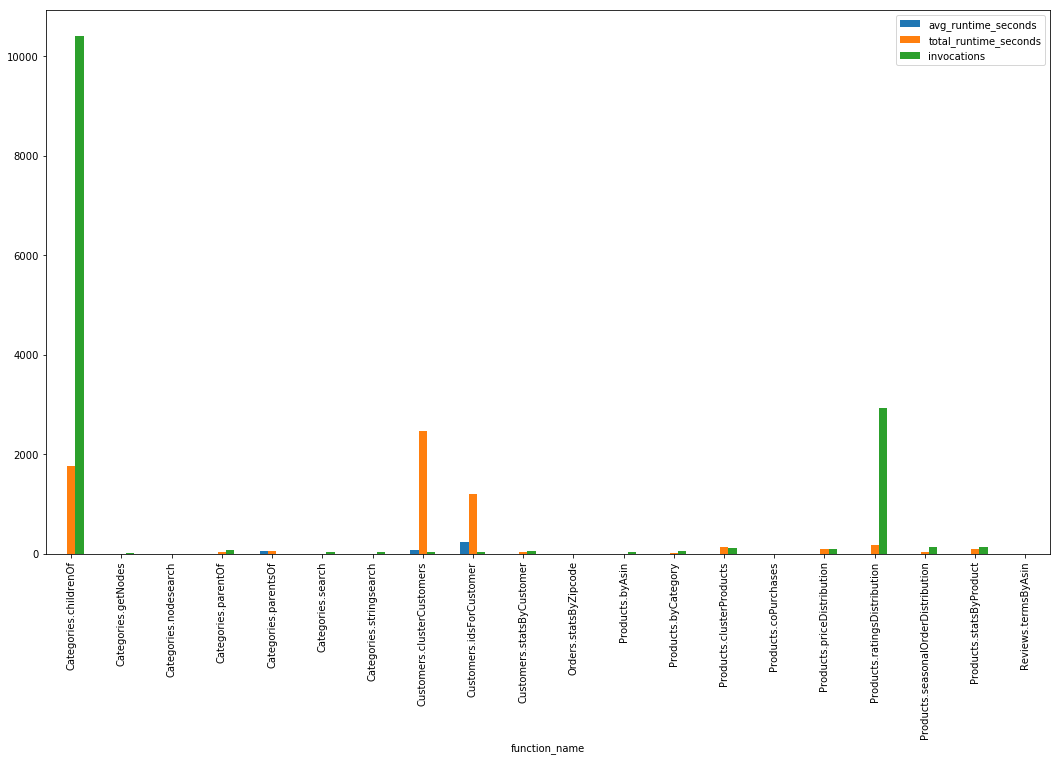

In [15]:
(df[['function_name',
    'avg_runtime_seconds',
    'total_runtime_seconds',
    'invocations']]
    .groupby(['function_name'])
    .sum()
    .plot.bar())

plt.show()

# Recommendation Exploration

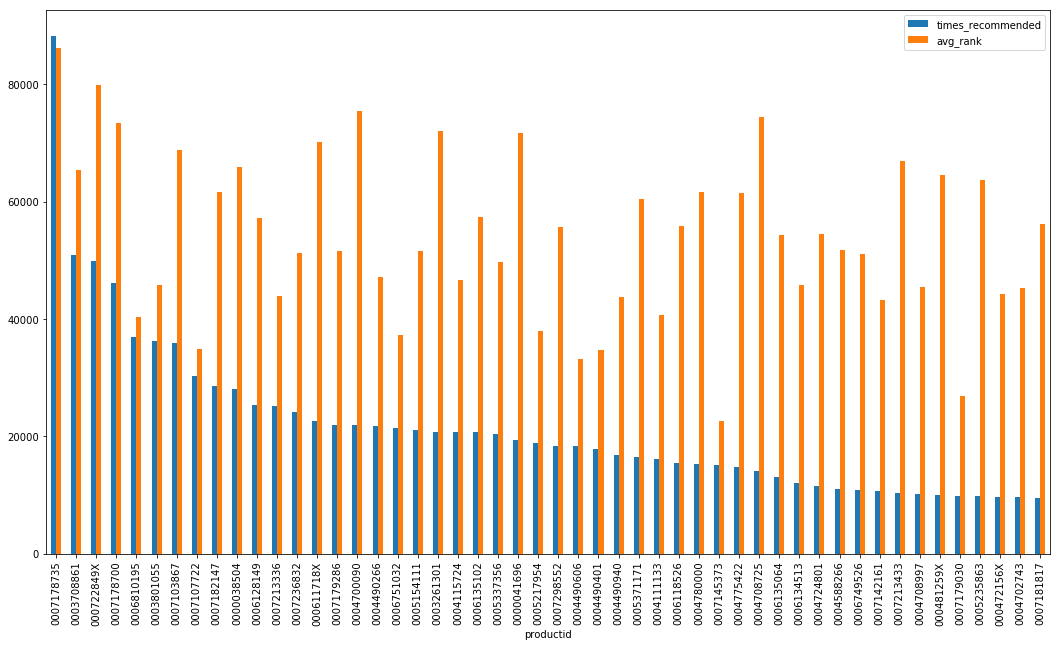

In [16]:
df = (explorer
    .recommendations
    .statsByProduct()
    .to_pandas()
    .set_index(['productid']))

df['avg_rank'] = df['avg_rank'].astype(float) * 10000

(df[['times_recommended','avg_rank']][:50].plot.bar())
plt.show()